<h1>CIFAR 10 Image Classification Project</h1>

<h3>Sanskar Maharana<br>
Techno Hacks Project<br>
Task 3</h3>

<img src = "cifar10.png" width='500' height = '500'>

## Importing the libraries

In [7]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

## Defining the Transforms


In [9]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

## Gathering the train and test data

In [11]:
train_data=datasets.CIFAR10('data',train=True,download=True,transform=transform_train)
test_data=datasets.CIFAR10('data',train=False,download=True,transform=transform_test)

100%|██████████| 170498071/170498071 [04:16<00:00, 665876.95it/s] 


Extracting data\cifar-10-python.tar.gz to data
Files already downloaded and verified


## Defining our Train, Valid and Test Dataloaders

In [12]:
num_workers=0
batch_size=50
valid_size=0.2
train_length = len(train_data)
indices=list(range(len(train_data)))
split = int(np.floor(valid_size * train_length))

np.random.shuffle(indices)

train_idx=indices[split:]
valid_idx=indices[:split]

train_sampler=SubsetRandomSampler(train_idx)
validation_sampler=SubsetRandomSampler(valid_idx)

train_loader=DataLoader(train_data,num_workers=num_workers,batch_size=batch_size,sampler=train_sampler)
valid_loader=DataLoader(train_data,num_workers=num_workers,batch_size=batch_size,sampler=validation_sampler)
test_loader=DataLoader(test_data,shuffle=True,num_workers=num_workers,batch_size=batch_size)

In [17]:
dataiter = iter(train_loader)
data = next(dataiter)
images,labels=next(dataiter)
images,labels,images.shape,labels.shape

(tensor([[[[-1.0000, -1.0000,  0.9922,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000,  0.8980,  ...,  0.4353, -1.0000, -1.0000],
           [-1.0000,  0.6078,  0.6784,  ..., -0.2941,  0.6784,  0.9294],
           ...,
           [-0.0196, -0.0824, -0.0039,  ..., -0.4431,  0.3569, -1.0000],
           [-1.0000, -1.0000, -0.1373,  ...,  0.4902, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ...,  0.5686, -1.0000, -1.0000]],
 
          [[-1.0000, -1.0000,  0.9922,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000,  0.9216,  ...,  0.6000, -1.0000, -1.0000],
           [-1.0000,  0.6627,  0.7255,  ...,  0.0510,  0.7569,  0.9451],
           ...,
           [-0.0745, -0.1294, -0.0588,  ..., -0.5529, -0.5373, -1.0000],
           [-1.0000, -1.0000, -0.1843,  ..., -0.6235, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -0.6941, -1.0000, -1.0000]],
 
          [[-1.0000, -1.0000,  0.9843,  ..., -1.0000, -1.0000, -1.0000],
           [-

## Visualizing a Training batch

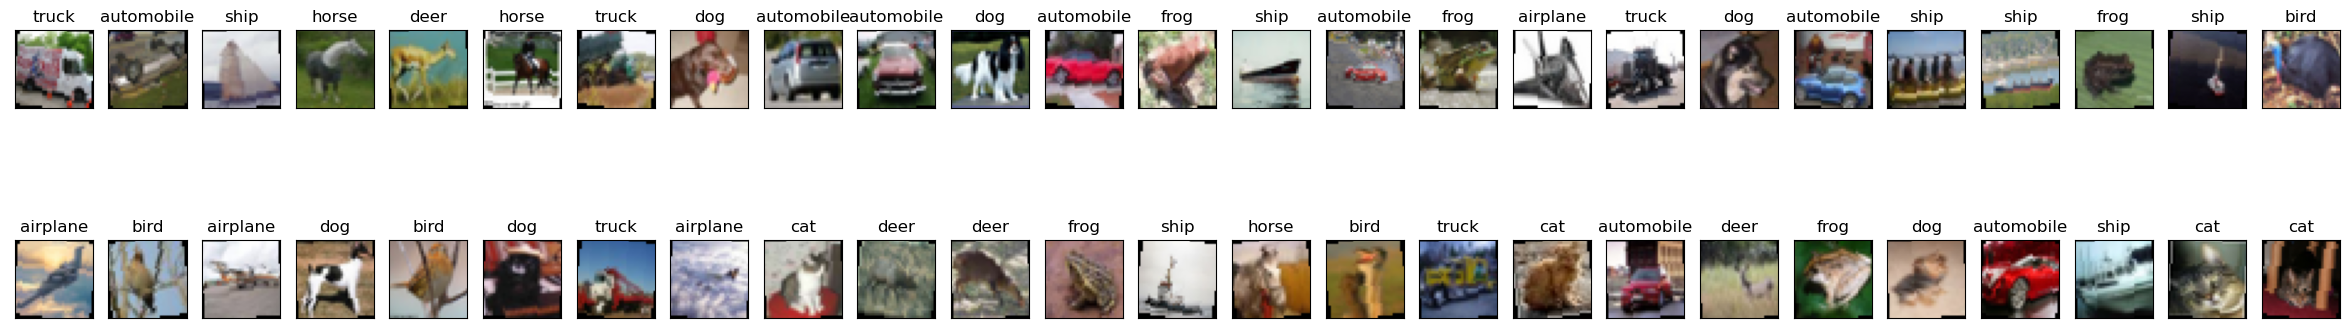

In [20]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

def RGBshow(img):
    img=img*0.5+0.5
    plt.imshow(np.transpose(img,(1,2,0)))

fig=plt.figure(1,figsize=(30,5))
for idx in range(batch_size):
    ax=fig.add_subplot(2,batch_size//2,idx+1,xticks=[],yticks=[])
    RGBshow(images[idx])
    ax.set_title(classes[labels[idx]])

## Defining our Neural Net Architecture

In [21]:
class FNet(nn.Module):
    def __init__(self):
        super(FNet,self).__init__()
        self.fc1=nn.Linear(3*32*32,2048)
        self.fc2=nn.Linear(2048,1024)
        self.fc3=nn.Linear(1024,512)
        self.fc4=nn.Linear(512,256)
        self.out=nn.Linear(256,10)
        self.dropout=nn.Dropout(0.25)

    def forward(self,x):
        x=x.view(-1,32*32*3)
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.dropout(F.relu(self.fc3(x)))
        x=self.dropout(F.relu(self.fc4(x)))
        x=self.out(x)
        return x

class convNet(nn.Module):
    def __init__(self):
        super(convNet,self).__init__()
        self.conv1=nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,stride=1,padding=1)
        self.conv2=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.conv3=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1)
        self.conv4=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1)
        self.conv5=nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1)
        self.b1=nn.BatchNorm2d(16)
        self.b2=nn.BatchNorm2d(64)
        self.b3=nn.BatchNorm2d(256)
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)  

        self.dropout=nn.Dropout(0.1)
        self.fc1=nn.Linear(256,128)
        self.fc2=nn.Linear(128,64)
        self.out=nn.Linear(64,10)


    def forward(self,x):
        x=self.pool(F.relu(self.b1(self.conv1(x))))
        x=self.pool(F.relu(self.conv2(x)))
        x=self.pool(F.relu(self.b2(self.conv3(x))))
        x=self.pool(F.relu(self.conv4(x)))
        x=self.pool(F.relu(self.b3(self.conv5(x))))
        x=x.view(-1,256)
        x = self.dropout(x)
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.out(x)   
        return x



In [22]:
def weight_init_normal(m):
    classname=m.__class__.__name__
    if classname.find('Linear')!=-1:
        n = m.in_features
        y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)

model_1=FNet()
model_2=convNet()
model_1.apply(weight_init_normal),model_2.apply(weight_init_normal)
use_cuda=True
if use_cuda and torch.cuda.is_available():
    model_1.cuda()
    model_2.cuda()
print(model_1,'\n\n\n\n',model_2,'\n','On GPU : ',use_cuda and torch.cuda.is_available())

FNet(
  (fc1): Linear(in_features=3072, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
) 



 convNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=

## Defining the Loss Function

In [23]:
criterion=nn.CrossEntropyLoss()

## Training and Validation Phase

In [26]:
def trainNet(model,lr,trainer,validater):
    optimizer=torch.optim.SGD(model.parameters(),lr=lr,momentum=0.9)

    loss_keeper={'train':[],'valid':[]}
    acc_keeper={'train':[],'valid':[]}
    train_class_correct = list(0. for i in range(10))
    valid_class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    epochs=50

    valid_loss_min = np.Inf 

    for epoch in range(epochs):
        train_loss=0.0
        valid_loss=0.0
        train_correct=0.0
        valid_correct=0.0
     
# TRAINING PHASE
     
        model.train()
        for images,labels in trainer:
            if use_cuda and torch.cuda.is_available():
                images,labels=images.cuda(),labels.cuda()
            optimizer.zero_grad()
            output=model(images)
            loss=criterion(output,labels)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()
            _, pred = torch.max(output, 1)
            train_correct=np.squeeze(pred.eq(labels.data.view_as(pred)))
            for idx in range(batch_size):
                label = labels[idx]
                train_class_correct[label] += train_correct[idx].item()
                class_total[label] += 1


# VALIDATION PHASE

        model.eval() 
        for images,labels in validater:
            if use_cuda and torch.cuda.is_available():
                images,labels=images.cuda(),labels.cuda()
            output=model(images)
            loss=criterion(output,labels)
            valid_loss+=loss.item()
            _, pred = torch.max(output, 1)
            valid_correct=np.squeeze(pred.eq(labels.data.view_as(pred)))
            for idx in range(batch_size):
                label = labels[idx]
                valid_class_correct[label] += valid_correct[idx].item()
                class_total[label] += 1

        # Calculating loss over entire batch size for every epoch
        train_loss = train_loss/len(trainer)
        valid_loss = valid_loss/len(validater)

        # Calculating loss over entire batch size for every epoch
        train_acc=float(100. * np.sum(train_class_correct) / np.sum(class_total))
        valid_acc=float(100. * np.sum(valid_class_correct) / np.sum(class_total))

        # saving loss values
        loss_keeper['train'].append(train_loss)
        loss_keeper['valid'].append(valid_loss)

        # saving acc values
        acc_keeper['train'].append(train_acc)
        acc_keeper['valid'].append(valid_acc)

        print(f"Epoch : {epoch+1}")
        print(f"Training Loss : {train_loss}\tValidation Loss : {valid_loss}")

        if valid_loss<=valid_loss_min:
            print(f"Validation loss decreased from : {valid_loss_min} ----> {valid_loss} ----> Saving Model.......")
            z=type(model).__name__
            torch.save(model.state_dict(), z+'_model.pth')
            valid_loss_min=valid_loss

        print(f"Training Accuracy : {train_acc}\tValidation Accuracy : {valid_acc}\n\n")

    return(loss_keeper,acc_keeper)

In [27]:
m1_loss,m1_acc=trainNet(model_1,0.01,train_loader,valid_loader)

Epoch : 1
Training Loss : 1.444422498345375	Validation Loss : 1.3828279292583465
Validation loss decreased from : inf ----> 1.3828279292583465 ----> Saving Model.......
Training Accuracy : 38.844	Validation Accuracy : 10.092


Epoch : 2
Training Loss : 1.4079140502214431	Validation Loss : 1.3508395186066628
Validation loss decreased from : 1.3828279292583465 ----> 1.3508395186066628 ----> Saving Model.......
Training Accuracy : 39.442	Validation Accuracy : 10.184


Epoch : 3
Training Loss : 1.3803523510694504	Validation Loss : 1.3700237980484962
Training Accuracy : 39.832	Validation Accuracy : 10.219333333333333


Epoch : 4
Training Loss : 1.3550862519443034	Validation Loss : 1.3268194863200187
Validation loss decreased from : 1.3508395186066628 ----> 1.3268194863200187 ----> Saving Model.......
Training Accuracy : 40.279	Validation Accuracy : 10.2925


Epoch : 5
Training Loss : 1.3354891256242991	Validation Loss : 1.2934049689769744
Validation loss decreased from : 1.3268194863200187 

Epoch : 43
Training Loss : 0.8688517509400845	Validation Loss : 1.2193377017974854
Training Accuracy : 48.62613953488372	Validation Accuracy : 11.337023255813953


Epoch : 44
Training Loss : 0.8635206570103765	Validation Loss : 1.2324208667874337
Training Accuracy : 48.77790909090909	Validation Accuracy : 11.346272727272726


Epoch : 45
Training Loss : 0.8579588317871094	Validation Loss : 1.2191370788216591
Training Accuracy : 48.92466666666667	Validation Accuracy : 11.355777777777778


Epoch : 46
Training Loss : 0.8497652463614941	Validation Loss : 1.1925267234444619
Training Accuracy : 49.06878260869565	Validation Accuracy : 11.36695652173913


Epoch : 47
Training Loss : 0.8410966418311	Validation Loss : 1.2126802706718445
Training Accuracy : 49.21348936170213	Validation Accuracy : 11.379276595744681


Epoch : 48
Training Loss : 0.8284595863893628	Validation Loss : 1.2444390699267387
Training Accuracy : 49.357416666666666	Validation Accuracy : 11.390041666666667


Epoch : 49
Training

In [28]:
m1_loss,m1_acc


({'train': [1.444422498345375,
   1.4079140502214431,
   1.3803523510694504,
   1.3550862519443034,
   1.3354891256242991,
   1.31005109667778,
   1.2978634971380234,
   1.2731544601917266,
   1.2539164419472217,
   1.2360803540050984,
   1.2205784152448178,
   1.2025501649826764,
   1.1863771344721317,
   1.1759860713034869,
   1.1645559537410737,
   1.1458707266300916,
   1.1347975793480873,
   1.1253747642040253,
   1.1075247413665057,
   1.0955550874769688,
   1.0799665974080563,
   1.0749385921657086,
   1.0604096555709839,
   1.0517155435681342,
   1.041355721503496,
   1.0312041674554349,
   1.022272169366479,
   1.0083600825071335,
   0.994325156956911,
   0.9929153621941805,
   0.9707936646044254,
   0.9706124817579984,
   0.9523313295841217,
   0.9525211025029421,
   0.9429254882410169,
   0.9308972308039665,
   0.9261411110311747,
   0.9103031306713819,
   0.9040595994517208,
   0.8925725799053907,
   0.887896084934473,
   0.8763007261231541,
   0.8688517509400845,
   0.8635

In [29]:
m2_loss,m2_acc=trainNet(model_2,0.01,train_loader,valid_loader)

Epoch : 1
Training Loss : 1.552065376713872	Validation Loss : 1.3318941757082938
Validation loss decreased from : inf ----> 1.3318941757082938 ----> Saving Model.......
Training Accuracy : 34.266	Validation Accuracy : 10.47


Epoch : 2
Training Loss : 1.2264795300364495	Validation Loss : 1.3404892668128014
Training Accuracy : 39.506	Validation Accuracy : 10.589


Epoch : 3
Training Loss : 1.080942284911871	Validation Loss : 0.9631358405947685
Validation loss decreased from : 1.3318941757082938 ----> 0.9631358405947685 ----> Saving Model.......
Training Accuracy : 42.86266666666667	Validation Accuracy : 11.458


Epoch : 4
Training Loss : 0.9907695345580578	Validation Loss : 0.9132641285657883
Validation loss decreased from : 0.9631358405947685 ----> 0.9132641285657883 ----> Saving Model.......
Training Accuracy : 45.3035	Validation Accuracy : 11.994


Epoch : 5
Training Loss : 0.9089159645885229	Validation Loss : 0.884594071507454
Validation loss decreased from : 0.9132641285657883 ----

Epoch : 45
Training Loss : 0.3314198645018041	Validation Loss : 0.6445197868347168
Training Accuracy : 63.882266666666666	Validation Accuracy : 15.119911111111112


Epoch : 46
Training Loss : 0.32450750686228275	Validation Loss : 0.649436810836196
Training Accuracy : 64.03595652173912	Validation Accuracy : 15.139391304347827


Epoch : 47
Training Loss : 0.3203176653850824	Validation Loss : 0.6681094773113727
Training Accuracy : 64.18727659574468	Validation Accuracy : 15.155446808510638


Epoch : 48
Training Loss : 0.31983999229967597	Validation Loss : 0.6574321638047695
Training Accuracy : 64.33275	Validation Accuracy : 15.17275


Epoch : 49
Training Loss : 0.31328508402220906	Validation Loss : 0.6726731069386005
Training Accuracy : 64.47620408163266	Validation Accuracy : 15.185714285714285


Epoch : 50
Training Loss : 0.3105053909961134	Validation Loss : 0.6853147314488888
Training Accuracy : 64.61412	Validation Accuracy : 15.2012




In [30]:
m2_loss,m2_acc

({'train': [1.552065376713872,
   1.2264795300364495,
   1.080942284911871,
   0.9907695345580578,
   0.9089159645885229,
   0.8587826881930232,
   0.8156928285583853,
   0.7750641336664558,
   0.7491524656116962,
   0.7144923654943705,
   0.6898457709699869,
   0.6635162564739585,
   0.6456898371502757,
   0.627474248111248,
   0.6091204316169023,
   0.5987152304127812,
   0.5742857578769326,
   0.5592486204206943,
   0.5529038256034255,
   0.5387269525602459,
   0.5245277962647379,
   0.5108002988994121,
   0.5018750949576497,
   0.4896335627697408,
   0.4826456958055496,
   0.4710356364957988,
   0.4619447006098926,
   0.45565833469852807,
   0.4425865056179464,
   0.4308503439277411,
   0.4215048491861671,
   0.4225955818220973,
   0.40860868591815236,
   0.40282935244962575,
   0.39552711450494826,
   0.3891686909087002,
   0.37768670173361896,
   0.37844713012687864,
   0.3675754308514297,
   0.36664906520396473,
   0.3519792743772268,
   0.3466138494946063,
   0.3488724153861403

## Loading model from Lowest Validation Loss

In [31]:
# Loading the model from the lowest validation loss 
model_1.load_state_dict(torch.load('FNet_model.pth'))
model_2.load_state_dict(torch.load('convNet_model.pth'))

<All keys matched successfully>

In [32]:
print(model_1.state_dict,'\n\n\n\n',model_2.state_dict)

<bound method Module.state_dict of FNet(
  (fc1): Linear(in_features=3072, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)> 



 <bound method Module.state_dict of convNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

## Plotting Training and Validation Losses

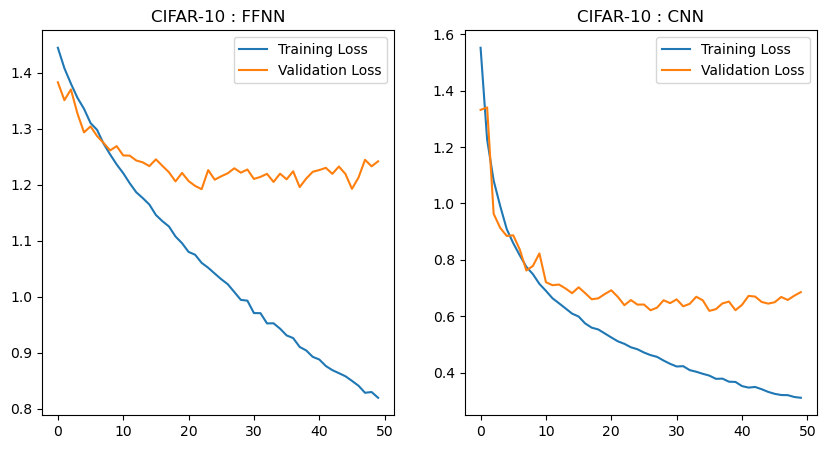

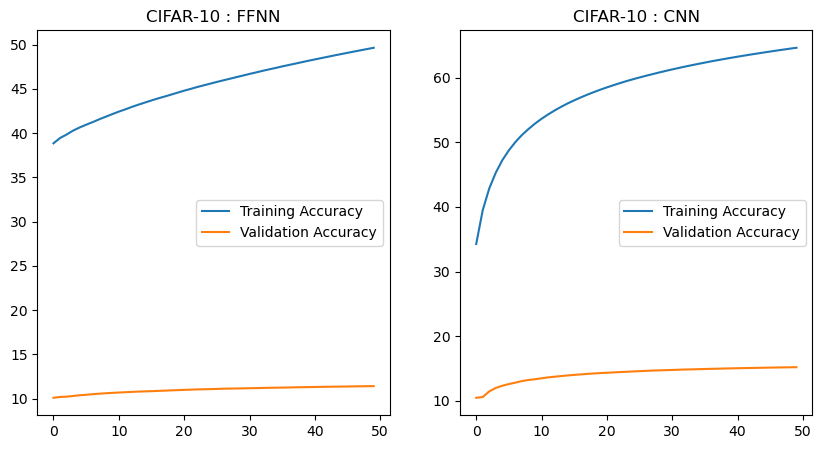

In [33]:
title=['FFNN','CNN']
model_losses=[m1_loss,m2_loss]
model_accs=[m1_acc,m2_acc]

fig=plt.figure(1,figsize=(10,5))
idx=1
for i in model_losses:
  ax=fig.add_subplot(1,2,idx)
  ax.plot(i['train'],label="Training Loss")
  ax.plot(i['valid'],label="Validation Loss")
  ax.set_title('CIFAR-10 : '+title[idx-1])
  idx+=1
  plt.legend();

fig=plt.figure(2,figsize=(10,5))
idx=1
for i in model_accs:
  ax=fig.add_subplot(1,2,idx)
  ax.plot(i['train'],label="Training Accuracy")
  ax.plot(i['valid'],label="Validation Accuracy")
  ax.set_title('CIFAR-10 : '+title[idx-1])
  idx+=1
  plt.legend();

## Testing Phase

In [40]:
def test(model):
    test_loss=0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval() # test the model with dropout layers off
    for images,labels in test_loader:
        if use_cuda and torch.cuda.is_available():
            images,labels=images.cuda(),labels.cuda()
        output=model(images)
        loss=criterion(output,labels)
        test_loss+=loss.item()
        _,pred=torch.max(output,1)
        correct = np.squeeze(pred.eq(labels.data.view_as(pred)))

        for idx in range(batch_size):
            label = labels[idx]
            class_correct[label] += correct[idx].item()
            class_total[label] += 1


    test_loss=test_loss/len(test_loader)
    print(f'For {type(model).__name__} :')
    print(f"Test Loss: {test_loss}")
    print(f"Correctly predicted per class : {class_correct}, Total correctly perdicted : {sum(class_correct)}")
    print(f"Total Predictions per class : {class_total}, Total predictions to be made : {sum(class_total)}\n")
    for i in range(10):
      if class_total[i] > 0:
          print(f"Test Accuracy of class {classes[i]} : {float(100 * class_correct[i] / class_total[i])}% where {int(np.sum(class_correct[i]))} of {int(np.sum(class_total[i]))} were predicted correctly")
      else:
          print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print(f"\nOverall Test Accuracy : {float(100. * np.sum(class_correct) / np.sum(class_total))}% where {int(np.sum(class_correct))} of {int(np.sum(class_total))} were predicted correctly")
    # obtain one batch of test images
    dataiter = iter(test_loader)
    images, labels = next(dataiter)

    # get sample outputs
    if use_cuda and torch.cuda.is_available():
      images,labels=images.cuda(),labels.cuda()
    output = model(images)
    # convert output probabilities to predicted class
    _, preds = torch.max(output, 1)
    # prep images for display
    images = images.cpu().numpy()

    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(25, 15))
    for idx in np.arange(batch_size):
        ax = fig.add_subplot(5, batch_size//5, idx+1, xticks=[], yticks=[])
        RGBshow(np.squeeze(images[idx]))
        ax.set_title("{}({}) for {}({})".format(classes[preds[idx]],str(preds[idx].item()), classes[labels[idx]],str(labels[idx].item())),
                    color=("blue" if preds[idx]==labels[idx] else "red"))

## Visualizing Test batch with results

### FFNN

For FNet :
Test Loss: 1.2238912495970726
Correctly predicted per class : [631.0, 682.0, 381.0, 356.0, 452.0, 489.0, 734.0, 666.0, 726.0, 608.0], Total correctly perdicted : 5725.0
Total Predictions per class : [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0], Total predictions to be made : 10000.0

Test Accuracy of class airplane : 63.1% where 631 of 1000 were predicted correctly
Test Accuracy of class automobile : 68.2% where 682 of 1000 were predicted correctly
Test Accuracy of class bird : 38.1% where 381 of 1000 were predicted correctly
Test Accuracy of class cat : 35.6% where 356 of 1000 were predicted correctly
Test Accuracy of class deer : 45.2% where 452 of 1000 were predicted correctly
Test Accuracy of class dog : 48.9% where 489 of 1000 were predicted correctly
Test Accuracy of class frog : 73.4% where 734 of 1000 were predicted correctly
Test Accuracy of class horse : 66.6% where 666 of 1000 were predicted correctly
Test Accuracy of class ship

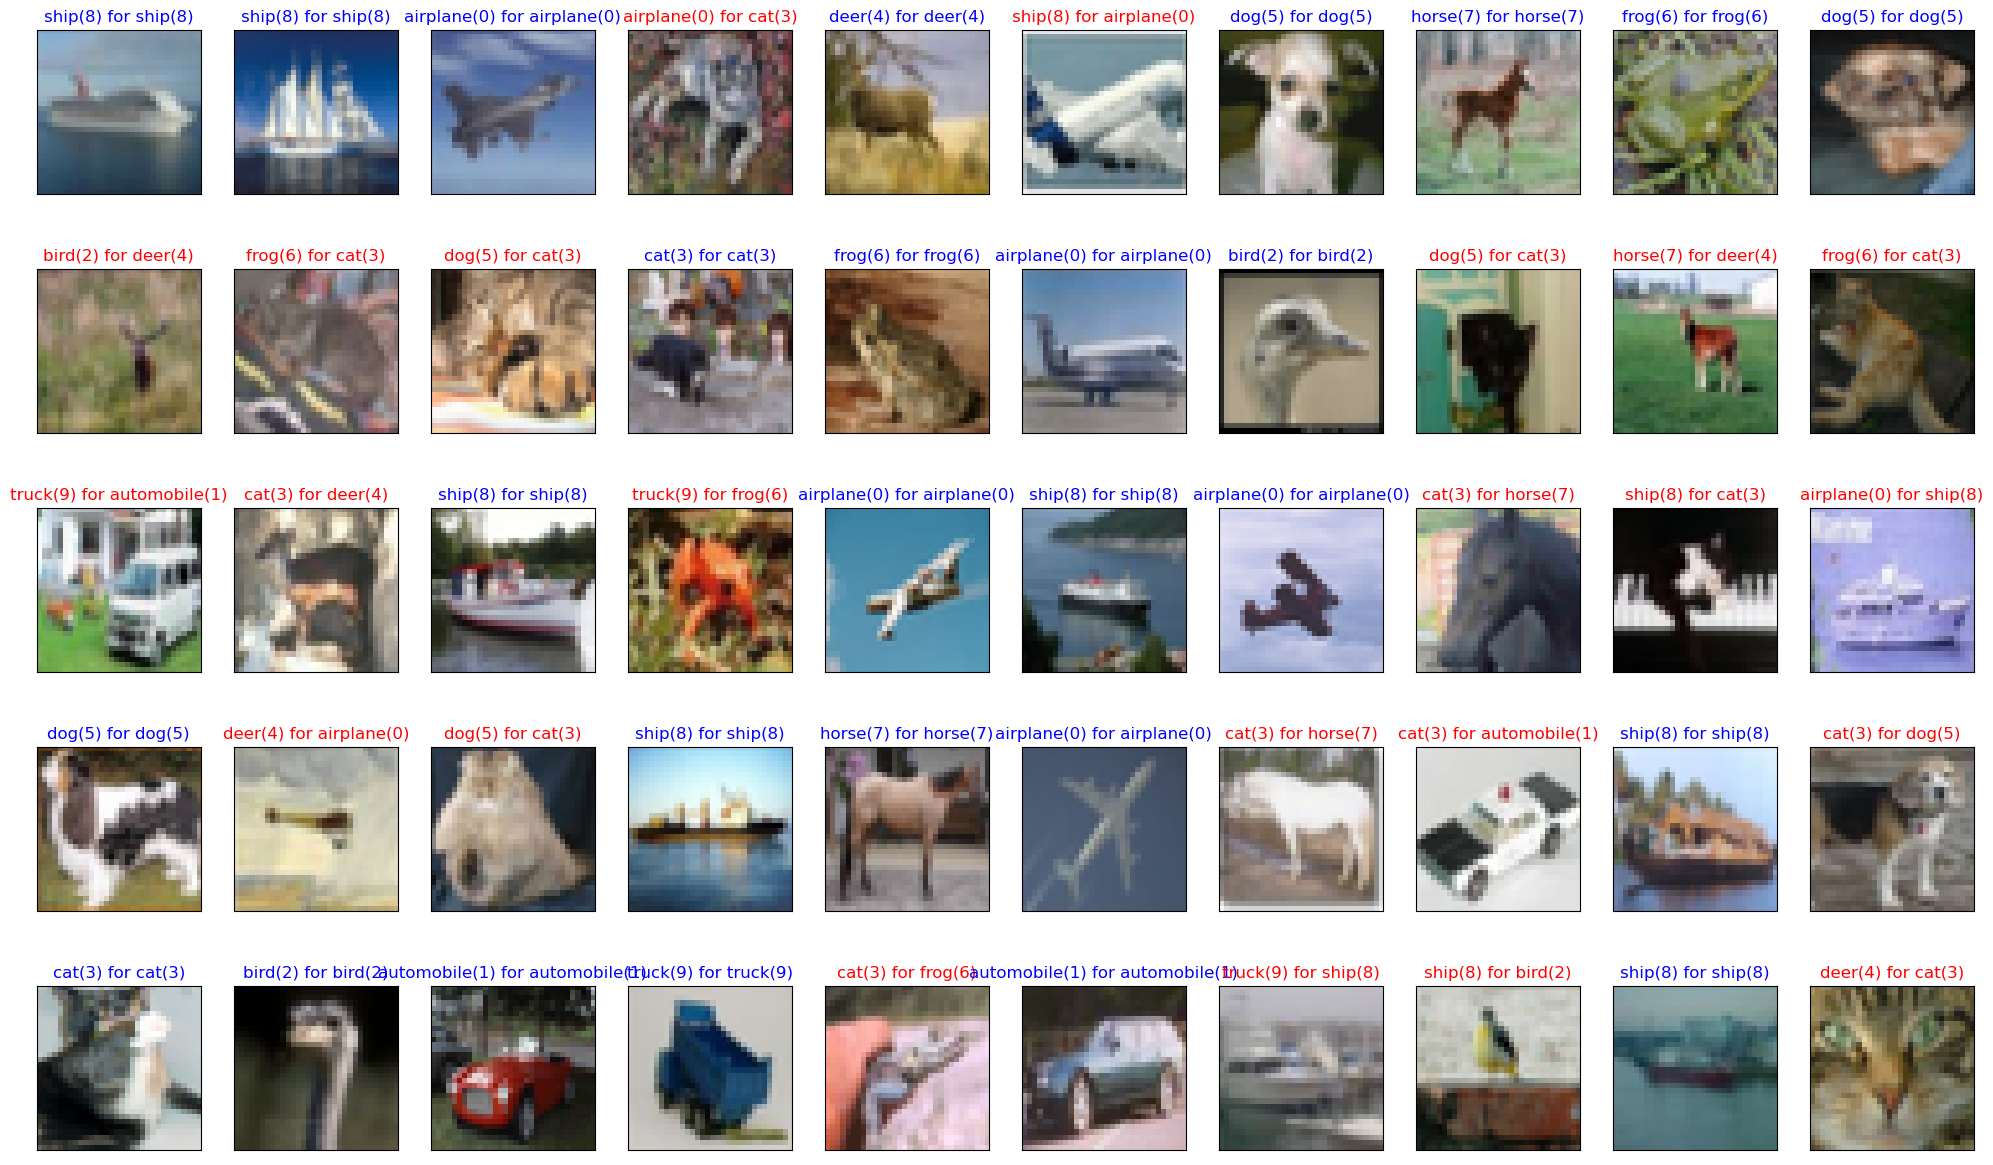

In [41]:
test(model_1)

### CNN

For convNet :
Test Loss: 0.5890062323212624
Correctly predicted per class : [796.0, 897.0, 750.0, 640.0, 814.0, 733.0, 878.0, 802.0, 912.0, 874.0], Total correctly perdicted : 8096.0
Total Predictions per class : [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0], Total predictions to be made : 10000.0

Test Accuracy of class airplane : 79.6% where 796 of 1000 were predicted correctly
Test Accuracy of class automobile : 89.7% where 897 of 1000 were predicted correctly
Test Accuracy of class bird : 75.0% where 750 of 1000 were predicted correctly
Test Accuracy of class cat : 64.0% where 640 of 1000 were predicted correctly
Test Accuracy of class deer : 81.4% where 814 of 1000 were predicted correctly
Test Accuracy of class dog : 73.3% where 733 of 1000 were predicted correctly
Test Accuracy of class frog : 87.8% where 878 of 1000 were predicted correctly
Test Accuracy of class horse : 80.2% where 802 of 1000 were predicted correctly
Test Accuracy of class s

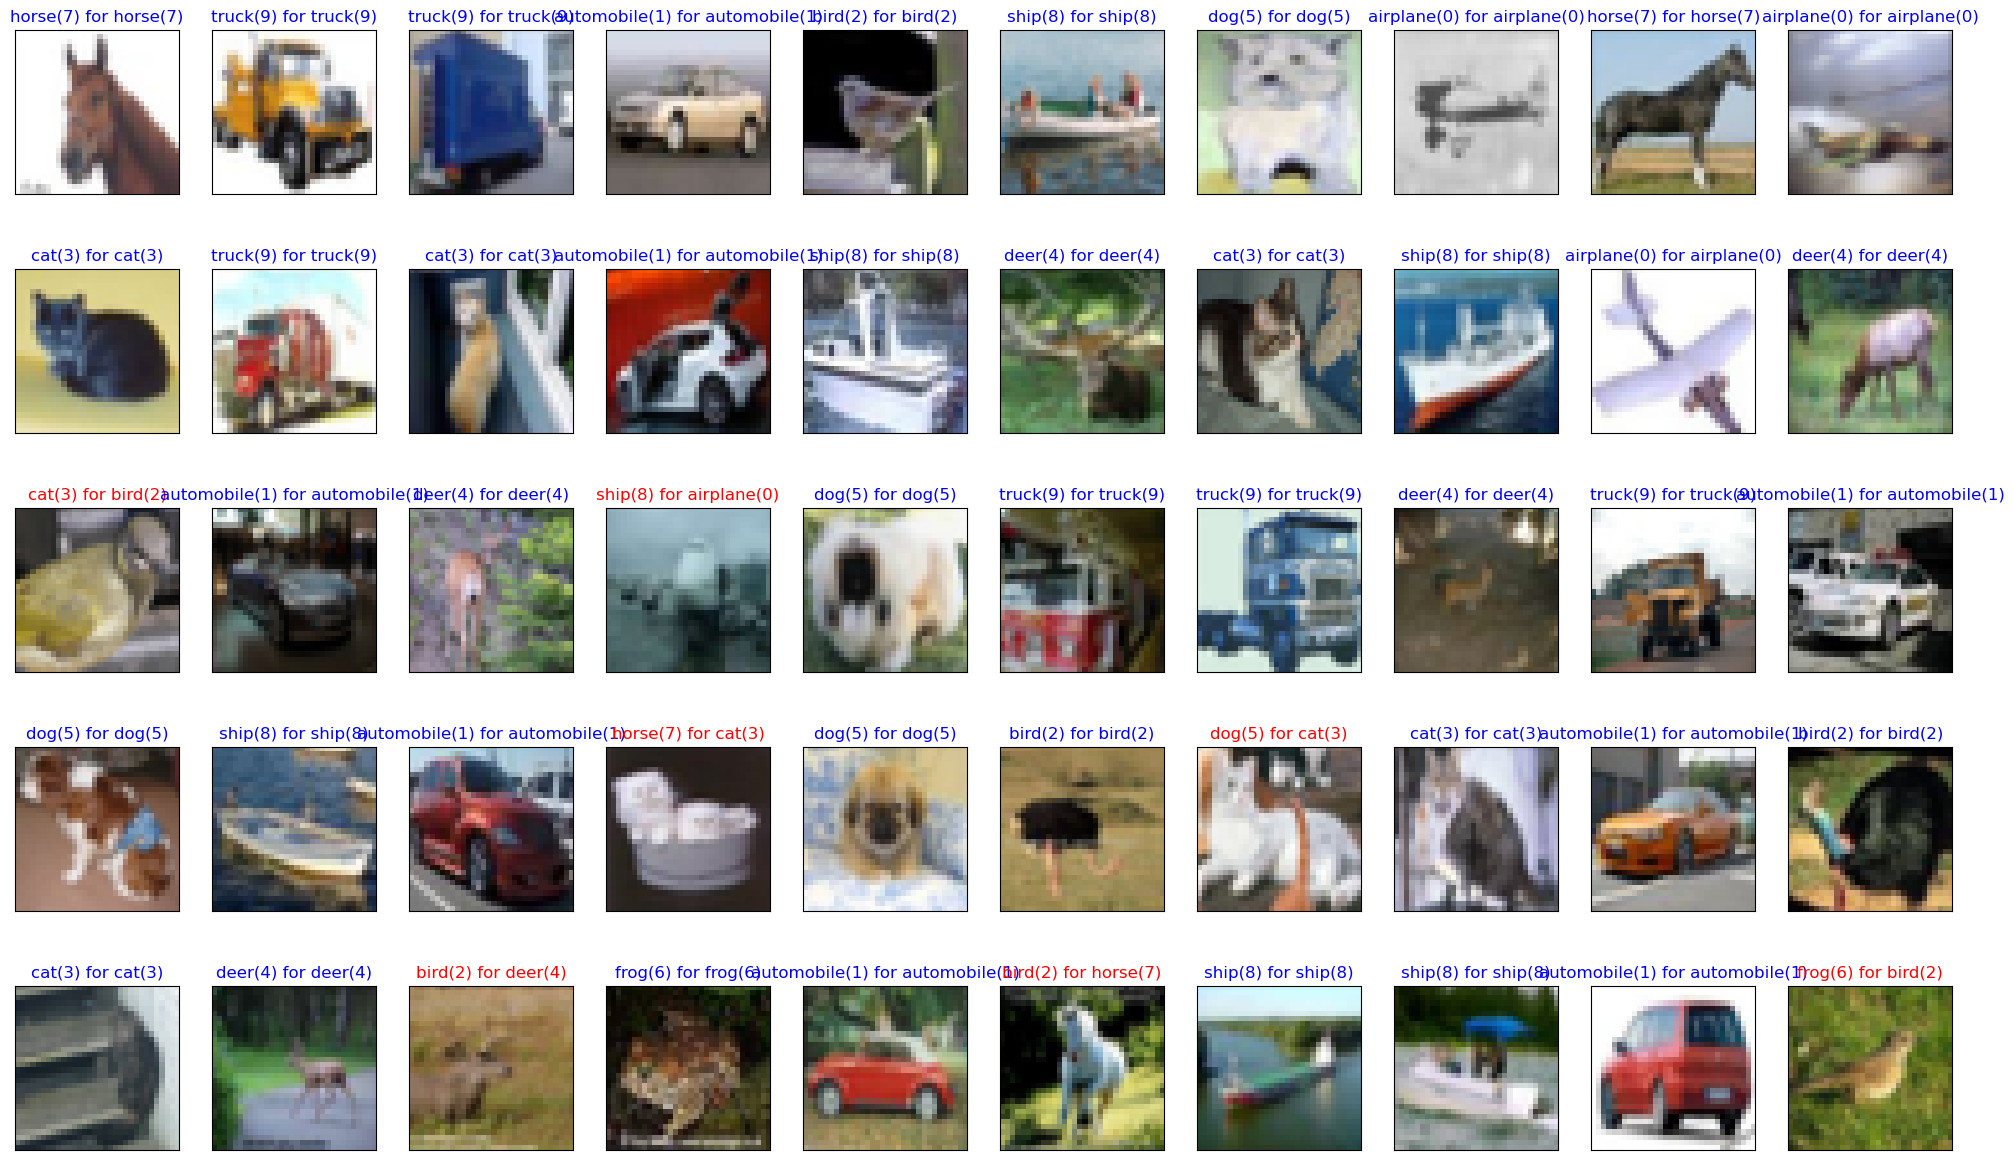

In [42]:
test(model_2)